# Importing Data and Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
#Showing top of the data
df

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3
...,...,...,...,...,...,...,...,...,...
436,Mg59.5Cu22.9Ag6.6Gd11,425.0,472.0,734.0,1.47,13.50,0.13,9.47,27.0
437,Pd2Zr48Cu34Al8Ag8,699.0,794.0,1140.0,1.61,15.89,0.14,10.73,30.0
438,Ni4Zr48Cu32Al8Ag8,693.0,788.0,1129.0,1.61,15.79,0.15,11.17,30.0
439,Zr46Cu31.64Ag8.36Al8Be6,702.0,797.0,1103.0,1.60,15.26,0.17,11.85,35.0


In [4]:
df.shape

(441, 9)

# Data Preprocessing and EDA

In [5]:
df.isna().sum()

Alloy    0
Tg       0
Tx       0
Tl       0
TEN      0
VA       0
d        0
Sm       0
Dmax     0
dtype: int64

In [6]:
features = [x for x in df.columns if x not in 'Alloy' and x not in 'Dmax']

In [7]:
print((features))

['Tg', 'Tx', 'Tl', 'TEN', 'VA', 'd', 'Sm']


### Correlation Analysis

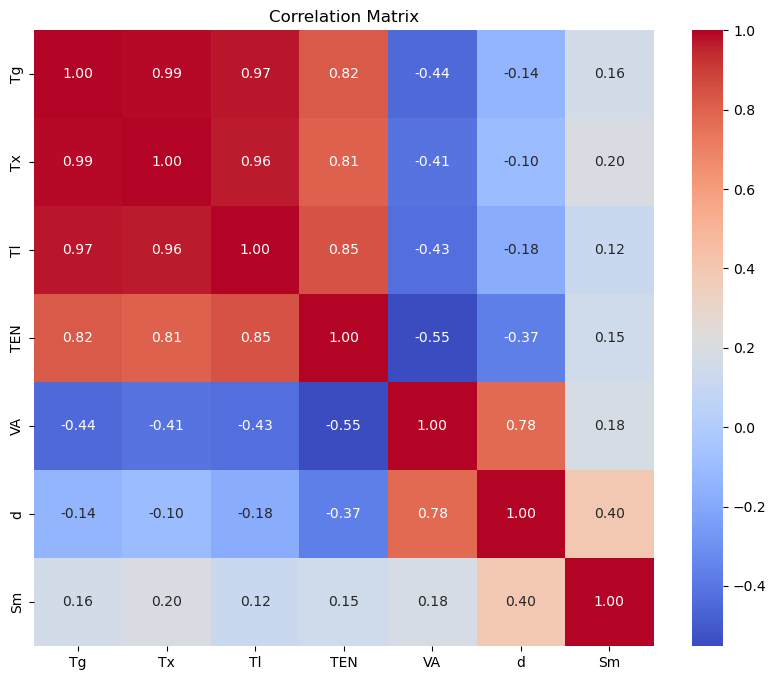

In [8]:
# Select the columns of interest
selected_columns = ['Tg', 'Tx', 'Tl', 'TEN', 'VA', 'd', 'Sm']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()
cm=correlation_matrix

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm")  # Plot the heatmap with numbers
plt.title('Correlation Matrix')  # Set the title
plt.show()

### Insights on Dataset

In [9]:
# Set the threshold for high correlation
threshold = 0.85  # You can adjust this threshold based on your preference

# Find highly correlated features
highly_correlated_features = set()  # Initialize an empty set to store highly correlated features

# Iterate through each pair of features in the correlation matrix
for i in range(len(selected_columns)):
    for j in range(i+1, len(selected_columns)):
        # Check if the absolute correlation coefficient is above the threshold
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            # Add both features to the set of highly correlated features
            feature1 = selected_columns[i]
            feature2 = selected_columns[j]
            highly_correlated_features.add(feature1)
            highly_correlated_features.add(feature2)

# Print the highly correlated features
print("Highly Correlated Features:", highly_correlated_features)


Highly Correlated Features: {'Tl', 'Tg', 'Tx'}


In [62]:
import plotly.graph_objects as go

# Create a list to store traces for each feature
traces = []

# Assuming 'features' is a list containing the names of your features
for feature in features:
    # Add a violin trace for the current feature
    trace = go.Violin(y=df[feature], name=feature, box_visible=True, meanline_visible=True)
    traces.append(trace)

# Create the figure
fig = go.Figure(data=traces)

# Customize layout
fig.update_layout(
    title='Violin Plot for Features before scaling',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Values')
)

# Show the plot
fig.show()

# Analyze insights
for feature in features:
    feature_values = df[feature]
    min_value = feature_values.min()
    max_value = feature_values.max()
    mean_value = feature_values.mean()
    median_value = feature_values.median()
    print(f"Feature: {feature}")
    print(f"Minimum Value: {min_value}")
    print(f"Maximum Value: {max_value}")
    print(f"Mean Value: {mean_value}")
    print(f"Median Value: {median_value}")
    print("\n")



Feature: Tg
Minimum Value: 308.0
Maximum Value: 934.0
Mean Value: 535.4975056689343
Median Value: 452.0


Feature: Tx
Minimum Value: 339.0
Maximum Value: 961.0
Mean Value: 587.8653061224489
Median Value: 496.0


Feature: Tl
Minimum Value: 581.0
Maximum Value: 1559.0
Mean Value: 936.2077097505669
Median Value: 842.0


Feature: TEN
Minimum Value: 0.97
Maximum Value: 1.79
Mean Value: 1.4812698412698413
Median Value: 1.46


Feature: VA
Minimum Value: 12.18
Maximum Value: 28.48
Mean Value: 17.65780045351474
Median Value: 15.83


Feature: d
Minimum Value: 0.08
Maximum Value: 0.27
Mean Value: 0.1567800453514739
Median Value: 0.14


Feature: Sm
Minimum Value: 3.99
Maximum Value: 16.34
Mean Value: 9.689002267573697
Median Value: 9.56




In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=len(features), subplot_titles=features)

# Add traces for each feature
for i, feature in enumerate(features, start=1):
    fig.add_trace(
        go.Histogram(x=df[feature], name=feature),
        row=1, col=i
    )

# Update layout
fig.update_layout(
    title_text="Density Plots for Features",
    showlegend=False,
    height=400,
    width=1200,
)

# Show plot
fig.show()


<Axes: ylabel='Density'>

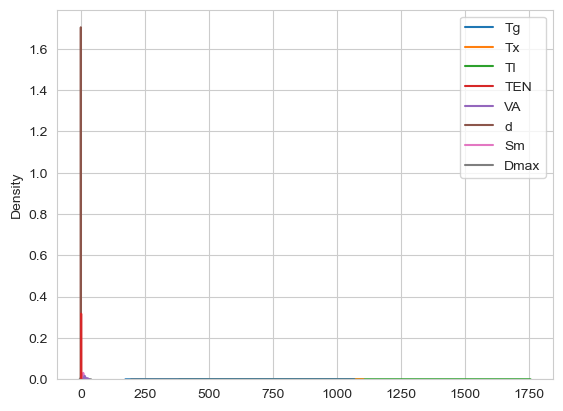

In [56]:
sns.kdeplot(df)

In [12]:
df

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3
...,...,...,...,...,...,...,...,...,...
436,Mg59.5Cu22.9Ag6.6Gd11,425.0,472.0,734.0,1.47,13.50,0.13,9.47,27.0
437,Pd2Zr48Cu34Al8Ag8,699.0,794.0,1140.0,1.61,15.89,0.14,10.73,30.0
438,Ni4Zr48Cu32Al8Ag8,693.0,788.0,1129.0,1.61,15.79,0.15,11.17,30.0
439,Zr46Cu31.64Ag8.36Al8Be6,702.0,797.0,1103.0,1.60,15.26,0.17,11.85,35.0


In [49]:
df.describe()


,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
count,441.000000,441.000000,441.00000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,535.497506,587.865306,936.20771,1.481270,17.657800,0.156780,9.689002,5.594626
std,150.703320,160.334816,221.28986,0.154813,4.645986,0.040182,1.605991,5.446026
min,308.000000,339.000000,581.00000,0.970000,12.180000,0.080000,3.990000,0.200000
25%,400.000000,440.000000,734.00000,1.360000,14.330000,0.130000,8.510000,2.000000
50%,452.000000,496.000000,842.00000,1.460000,15.830000,0.140000,9.560000,4.000000
75%,683.000000,745.000000,1154.00000,1.610000,19.090000,0.190000,10.730000,8.000000
max,934.000000,961.000000,1559.00000,1.790000,28.480000,0.270000,16.340000,35.000000


### Scaling and Standardisation

In [43]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Alloy' column
data_without_alloy = df.drop(columns=['Alloy'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_data = scaler.fit_transform(data_without_alloy)

# Convert the scaled data array into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_without_alloy.columns)

# Print the first few rows of the scaled DataFrame
scaled_df.head()


,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,0.893512,0.750125,1.311047,1.802478,-0.945501,-1.414670,-1.115220,-0.991687
1,0.627789,0.631488,1.193421,-0.008212,0.155622,-0.667222,-1.102753,-0.991687
2,0.694219,0.762613,1.283902,-0.008212,0.097442,-0.168924,-1.021714,-0.991687
3,-0.853620,-0.929520,-0.575499,-0.008212,-0.253797,-1.414670,-0.560416,-0.973304
4,-0.714116,-0.623562,-0.421680,0.703131,-0.454197,-1.414670,-0.148988,-0.973304


In [63]:
import plotly.graph_objects as go

# Create a list to store traces for each feature
traces = []

# Assuming 'features' is a list containing the names of your features
for feature in features:
    # Add a violin trace for the current feature
    trace = go.Violin(y=scaled_df[feature], name=feature, box_visible=True, meanline_visible=True)
    traces.append(trace)

# Create the figure
fig = go.Figure(data=traces)

# Customize layout
fig.update_layout(
    title='Violin Plot for Features after scaling',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Values')
)

# Show the plot
fig.show()


In [50]:
scaled_df.describe()

,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
count,4.410000e+02,4.410000e+02,4.410000e+02,4.410000e+02,4.410000e+02,4.410000e+02,4.410000e+02,4.410000e+02
mean,-4.269701e-16,2.416812e-16,1.208406e-17,-1.329247e-16,1.369527e-16,3.544658e-16,-4.511382e-16,6.444832e-17
std,1.001136e+00,1.001136e+00,1.001136e+00,1.001136e+00,1.001136e+00,1.001136e+00,1.001136e+00,1.001136e+00
min,-1.511286e+00,-1.553923e+00,-1.606992e+00,-3.306253e+00,-1.180378e+00,-1.912968e+00,-3.552619e+00,-9.916870e-01
25%,-9.001221e-01,-9.232757e-01,-9.148063e-01,-7.842215e-01,-7.170878e-01,-6.672225e-01,-7.349612e-01,-6.607953e-01
50%,-5.546814e-01,-5.736099e-01,-4.262044e-01,-1.375467e-01,-3.938618e-01,-4.180734e-01,-8.041686e-02,-2.931380e-01
75%,9.798723e-01,9.811541e-01,9.853124e-01,8.324655e-01,3.086161e-01,8.276723e-01,6.489325e-01,4.421768e-01
max,2.647288e+00,2.329865e+00,2.817570e+00,1.996480e+00,2.332011e+00,2.820865e+00,4.146069e+00,5.405551e+00


<Axes: ylabel='Density'>

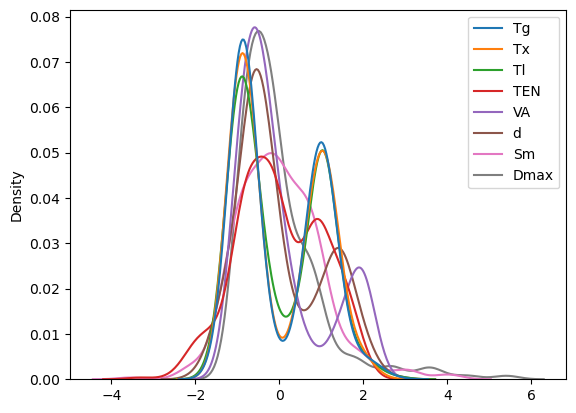

In [14]:
sns.kdeplot(scaled_df)

# Base Model Selection 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Initialize lists to store evaluation metrics for each model
rf_mse_scores = []
rf_r2_scores = []
adaboost_mse_scores = []
adaboost_r2_scores = []
extra_trees_mse_scores = []
extra_trees_r2_scores = []
gradboost_mse_scores = []
gradboost_r2_scores = []
xgb_mse_scores = []
xgb_r2_scores = []
poly_reg_mse_scores = []
poly_reg_r2_scores = []


# Repeat training process ten times
for i in range(10):
    # Split the dataset into features (X) and target variable (y)
    X = scaled_df[features]
    y = scaled_df['Dmax']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Initialize and train Random Forest model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_y_pred = rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_y_pred)
    rf_r2 = r2_score(y_test, rf_y_pred)
    rf_mse_scores.append(rf_mse)
    rf_r2_scores.append(rf_r2)
    
    # Initialize and train AdaBoost model
    adaboost_model = AdaBoostRegressor(random_state=42)
    adaboost_model.fit(X_train, y_train)
    adaboost_y_pred = adaboost_model.predict(X_test)
    adaboost_mse = mean_squared_error(y_test, adaboost_y_pred)
    adaboost_r2 = r2_score(y_test, adaboost_y_pred)
    adaboost_mse_scores.append(adaboost_mse)
    adaboost_r2_scores.append(adaboost_r2)
    
    # Initialize and train Extra Trees model
    extra_trees_model = ExtraTreesRegressor(random_state=42)
    extra_trees_model.fit(X_train, y_train)
    extra_trees_y_pred = extra_trees_model.predict(X_test)
    extra_trees_mse = mean_squared_error(y_test, extra_trees_y_pred)
    extra_trees_r2 = r2_score(y_test, extra_trees_y_pred)
    extra_trees_mse_scores.append(extra_trees_mse)
    extra_trees_r2_scores.append(extra_trees_r2)
    
    # Initialize and train Gradient Boosting model
    gradboost_model = GradientBoostingRegressor(random_state=42)
    gradboost_model.fit(X_train, y_train)
    gradboost_y_pred = gradboost_model.predict(X_test)
    gradboost_mse = mean_squared_error(y_test, gradboost_y_pred)
    gradboost_r2 = r2_score(y_test, gradboost_y_pred)
    gradboost_mse_scores.append(gradboost_mse)
    gradboost_r2_scores.append(gradboost_r2)
    
    # Initialize and train XGBoost model
    xgb_model = XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_y_pred = xgb_model.predict(X_test)
    xgb_mse = mean_squared_error(y_test, xgb_y_pred)
    xgb_r2 = r2_score(y_test, xgb_y_pred)
    xgb_mse_scores.append(xgb_mse)
    xgb_r2_scores.append(xgb_r2)

# Calculate the average and standard deviation for each model
avg_rf_mse = np.mean(rf_mse_scores)
std_rf_mse = np.std(rf_mse_scores)
avg_rf_r2 = np.mean(rf_r2_scores)
std_rf_r2 = np.std(rf_r2_scores)

avg_adaboost_mse = np.mean(adaboost_mse_scores)
std_adaboost_mse = np.std(adaboost_mse_scores)
avg_adaboost_r2 = np.mean(adaboost_r2_scores)
std_adaboost_r2 = np.std(adaboost_r2_scores)

avg_extra_trees_mse = np.mean(extra_trees_mse_scores)
std_extra_trees_mse = np.std(extra_trees_mse_scores)
avg_extra_trees_r2 = np.mean(extra_trees_r2_scores)
std_extra_trees_r2 = np.std(extra_trees_r2_scores)

avg_gradboost_mse = np.mean(gradboost_mse_scores)
std_gradboost_mse = np.std(gradboost_mse_scores)
avg_gradboost_r2 = np.mean(gradboost_r2_scores)
std_gradboost_r2 = np.std(gradboost_r2_scores)

avg_xgb_mse = np.mean(xgb_mse_scores)
std_xgb_mse = np.std(xgb_mse_scores)
avg_xgb_r2 = np.mean(xgb_r2_scores)
std_xgb_r2 = np.std(xgb_r2_scores)

# Print the results
print("Random Forest:")
print("Average Mean Squared Error:", avg_rf_mse)
print("Standard Deviation of Mean Squared Error:", std_rf_mse)
print("Average R-squared:", avg_rf_r2)
print("Standard Deviation of R-squared:", std_rf_r2)

print("\nAdaBoost:")
print("Average Mean Squared Error:", avg_adaboost_mse)
print("Standard Deviation of Mean Squared Error:", std_adaboost_mse)
print("Average R-squared:", avg_adaboost_r2)
print("Standard Deviation of R-squared:", std_adaboost_r2)

print("\nExtra Trees:")
print("Average Mean Squared Error:", avg_extra_trees_mse)
print("Standard Deviation of Mean Squared Error:", std_extra_trees_mse)
print("Average R-squared:", avg_extra_trees_r2)
print("Standard Deviation of R-squared:", std_extra_trees_r2)

print("\nGradient Boosting:")
print("Average Mean Squared Error:", avg_gradboost_mse)
print("Standard Deviation of Mean Squared Error:", std_gradboost_mse)
print("Average R-squared:", avg_gradboost_r2)
print("Standard Deviation of R-squared:", std_gradboost_r2)

print("\nXGBoost:")
print("Average Mean Squared Error:", avg_xgb_mse)
print("Standard Deviation of Mean Squared Error:", std_xgb_mse)
print("Average R-squared:", avg_xgb_r2)
print("Standard Deviation of R-squared:", std_xgb_r2)


Random Forest:
Average Mean Squared Error: 0.3950039298230955
Standard Deviation of Mean Squared Error: 0.11938033501014825
Average R-squared: 0.6213963255833374
Standard Deviation of R-squared: 0.11189864321245055

AdaBoost:
Average Mean Squared Error: 0.5550251576836241
Standard Deviation of Mean Squared Error: 0.1291575886887386
Average R-squared: 0.4623276033994599
Standard Deviation of R-squared: 0.14210393922452144

Extra Trees:
Average Mean Squared Error: 0.30794781675298105
Standard Deviation of Mean Squared Error: 0.07553526653242508
Average R-squared: 0.7049212524256372
Standard Deviation of R-squared: 0.06664374578422656

Gradient Boosting:
Average Mean Squared Error: 0.45929210838913914
Standard Deviation of Mean Squared Error: 0.11460048711241975
Average R-squared: 0.5577278578157816
Standard Deviation of R-squared: 0.11156141451388597

XGBoost:
Average Mean Squared Error: 0.39983229308687845
Standard Deviation of Mean Squared Error: 0.11584845718210801
Average R-squared: 

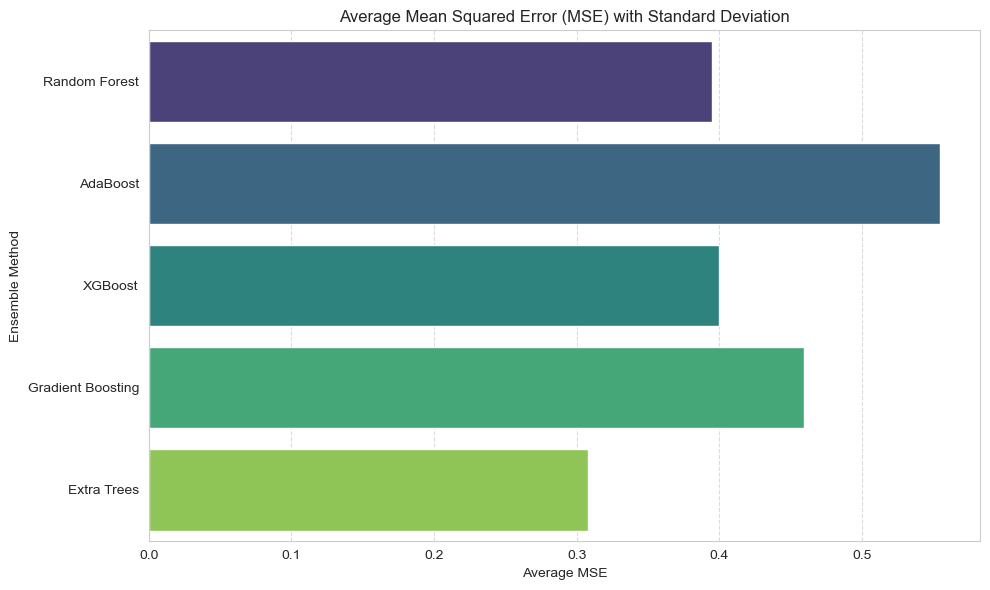

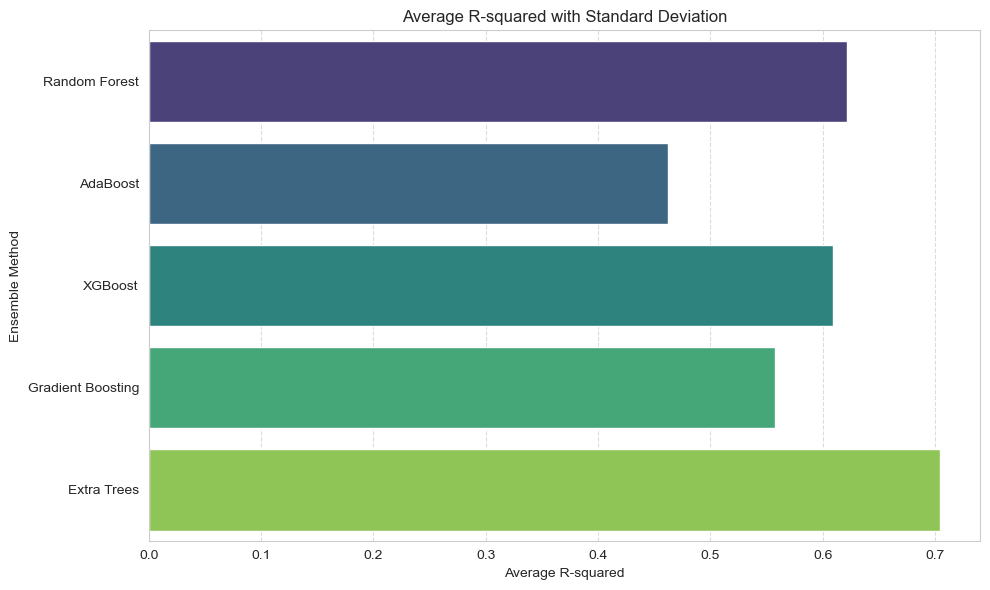

In [68]:
import seaborn as sns
import numpy as np

# Ensemble methods
methods = ['Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boosting', 'Extra Trees']

# Average MSE values
avg_mse = [avg_rf_mse, avg_adaboost_mse, avg_xgb_mse, avg_gradboost_mse, avg_extra_trees_mse]

# Standard deviation of MSE values
std_mse = [std_rf_mse, std_adaboost_mse, std_xgb_mse, std_gradboost_mse, std_extra_trees_mse]

# Average R-squared values
avg_r2 = [avg_rf_r2, avg_adaboost_r2, avg_xgb_r2, avg_gradboost_r2, avg_extra_trees_r2]

# Standard deviation of R-squared values
std_r2 = [std_rf_r2, std_adaboost_r2, std_xgb_r2, std_gradboost_r2, std_extra_trees_r2]

# Create a DataFrame for plotting
data_mse = {'Method': methods, 'Average MSE': avg_mse, 'Std MSE': std_mse}
data_r2 = {'Method': methods, 'Average R-squared': avg_r2, 'Std R-squared': std_r2}

# Plotting MSE with standard deviation
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(x='Average MSE', y='Method', data=data_mse, palette='viridis', capsize=0.1)
plt.title('Average Mean Squared Error (MSE) with Standard Deviation')
plt.xlabel('Average MSE')
plt.ylabel('Ensemble Method')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting R-squared with standard deviation
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(x='Average R-squared', y='Method', data=data_r2, palette='viridis', capsize=0.1)
plt.title('Average R-squared with Standard Deviation')
plt.xlabel('Average R-squared')
plt.ylabel('Ensemble Method')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


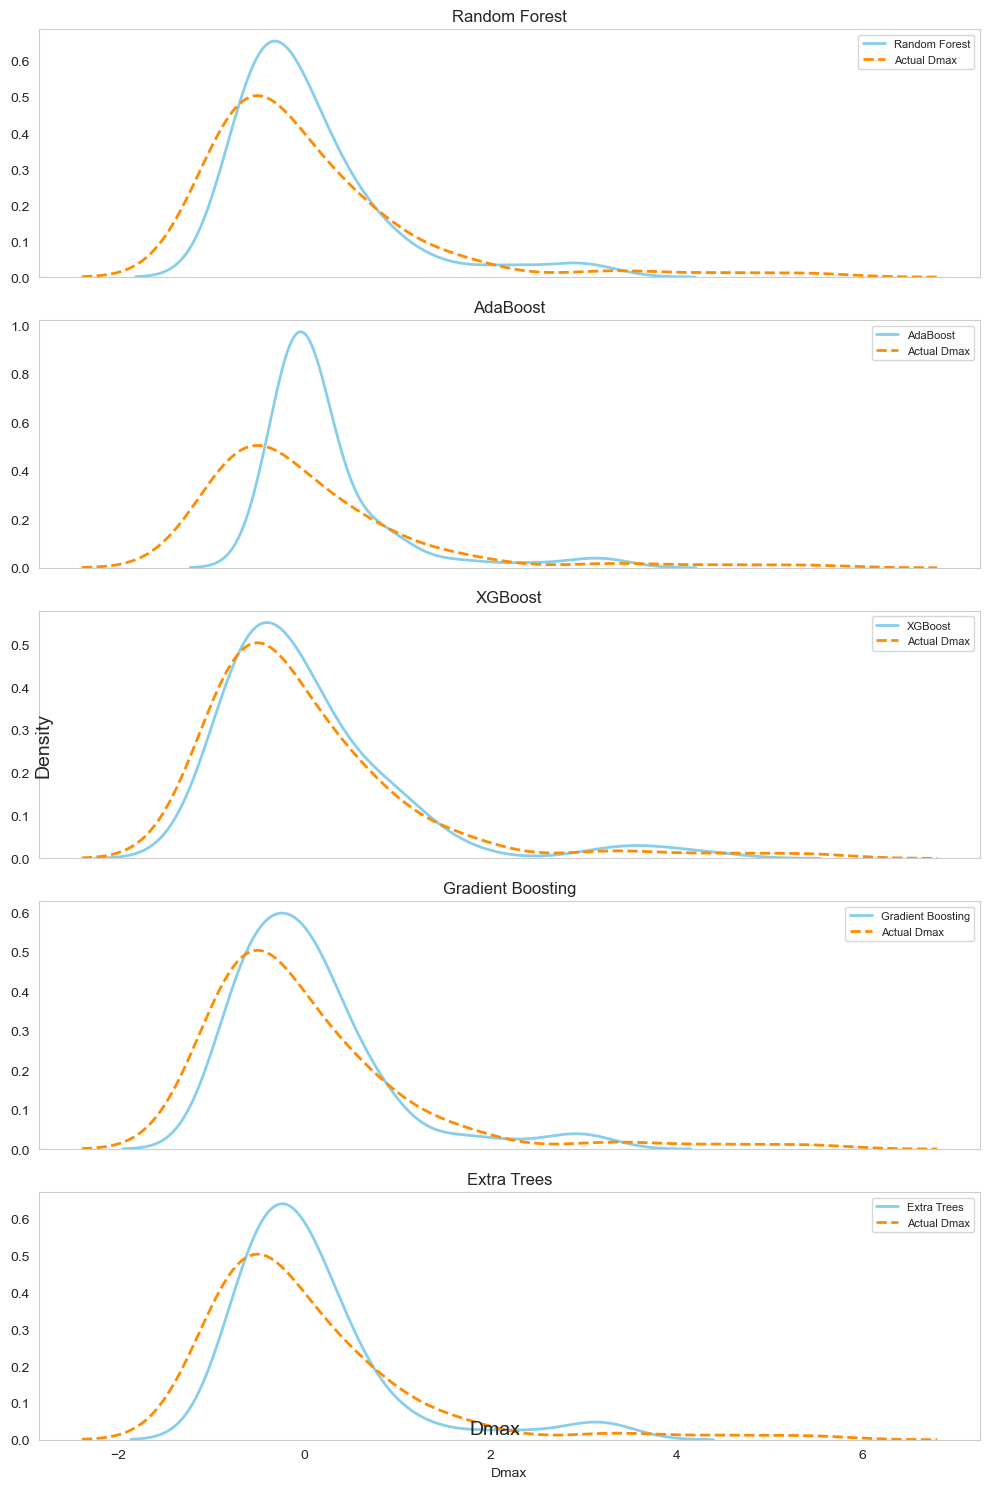

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Define the list of predicted values for each model
predicted_values = [rf_y_pred, adaboost_y_pred, xgb_y_pred, gradboost_y_pred, extra_trees_y_pred]

# Model names
model_names = ['Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boosting', 'Extra Trees']

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

# Plot KDE plot for each model
for i, ax in enumerate(axes):
    # Plot KDE plot for predicted values
    sns.kdeplot(predicted_values[i], ax=ax, label=model_names[i], color='skyblue', linewidth=2)
    
    # Plot actual values
    sns.kdeplot(y_test, ax=ax, label='Actual Dmax', color='darkorange', linestyle='--', linewidth=2)
    
    # Set title for each subplot
    ax.set_title(model_names[i], fontsize=12)
    
    # Set legend
    ax.legend(loc='upper right', fontsize=8)
    
    # Hide y-axis label
    ax.set_ylabel('')
    
    # Remove gridlines
    ax.grid(False)

# Set common x label
fig.text(0.5, 0.04, 'Dmax', ha='center', fontsize=14)

# Set common y label
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Final Stacked ensemble model

In [55]:
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import random 
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Initialize base models and meta-learner outside the loop
extra_trees_model = ExtraTreesRegressor(random_state=42)
nn_model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
meta_learner = clone(extra_trees_model)

# Initialize list to store R-squared scores for each split
r2_scores = []

# Perform 10 splits using KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train_base, X_val_base = X.iloc[train_index], X.iloc[test_index]
    y_train_base, y_val_base = y.iloc[train_index], y.iloc[test_index]

    # Split the training set further into training and validation sets for base models
    X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train_base, y_train_base, test_size=0.2, random_state=42)

    # Train base models
    extra_trees_model.fit(X_train_base, y_train_base)
    nn_model.fit(X_train_base, y_train_base, epochs=100, batch_size=32, verbose=0)

    # Generate predictions from base models for validation set
    extra_trees_pred_val = extra_trees_model.predict(X_val_base)
    nn_pred_val = nn_model.predict(X_val_base)

    # Stack predictions from base models for meta-learner
    stacked_X_val = np.column_stack((extra_trees_pred_val, nn_pred_val.flatten()))

    # Train meta-learner
    meta_learner.fit(stacked_X_val, y_val_base)

    # Generate predictions from base models for test set
    extra_trees_pred_test = extra_trees_model.predict(X_test)
    nn_pred_test = nn_model.predict(X_test)

    # Stack predictions from base models for meta-learner
    stacked_X_test = np.column_stack((extra_trees_pred_test, nn_pred_test.flatten()))

    # Make predictions using meta-learner
    ensemble_pred = meta_learner.predict(stacked_X_test)

    # Calculate R-squared for this split
    r2 = r2_score(y_test, ensemble_pred)
    r2_scores.append(r2)

# Calculate the average R-squared score across all splits
avg_r2 = np.mean(r2_scores)

# Print the average R-squared score
print("Average R-squared score over 10 splits using stacking:", avg_r2)


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Average R-squared score over 10 splits using stacking: 0.8221560931633245


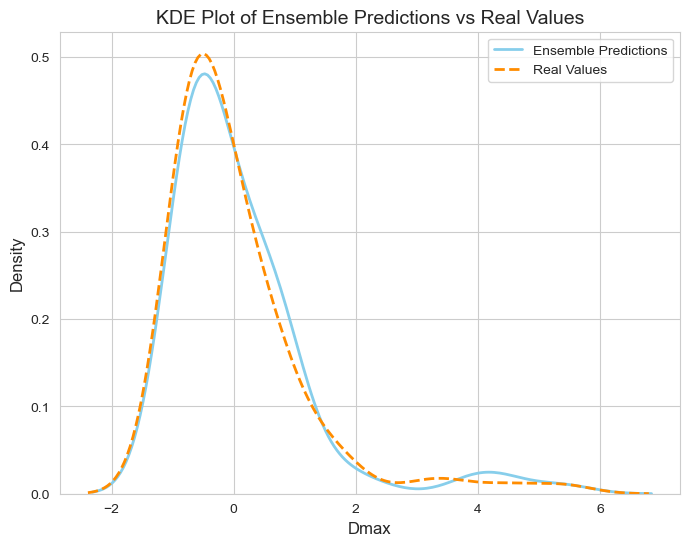

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Plot KDE plot for ensemble predictions and real values
plt.figure(figsize=(8, 6))
sns.kdeplot(ensemble_pred, label='Ensemble Predictions', color='skyblue', linewidth=2)
sns.kdeplot(y_test, label='Real Values', color='darkorange', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Dmax', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('KDE Plot of Ensemble Predictions vs Real Values', fontsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=10)

# Show plot
plt.show()


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\shami\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step


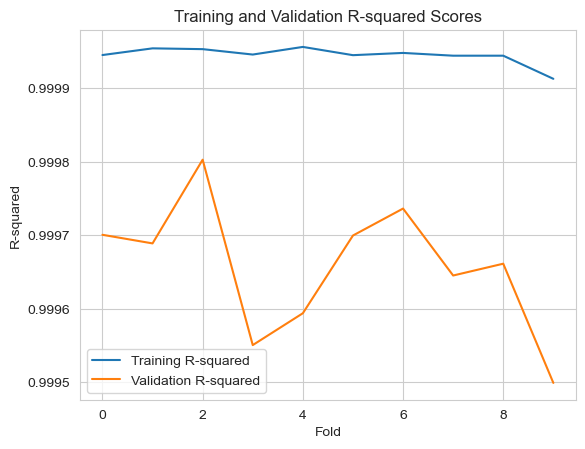

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Define the neural network model with L2 regularization
def create_regularized_model():
    model = Sequential([
        Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X.shape[1],)),
        Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize lists to store R-squared scores
train_r2_scores = []
val_r2_scores = []

# Perform k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Create and train the regularized model
    model = create_regularized_model()
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Calculate R-squared scores
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_r2_scores.append(train_r2)
    
    y_val_pred = model.predict(X_val)
    val_r2 = r2_score(y_val, y_val_pred)
    val_r2_scores.append(val_r2)

# Plot the R-squared scores
plt.plot(train_r2_scores, label='Training R-squared')
plt.plot(val_r2_scores, label='Validation R-squared')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Training and Validation R-squared Scores')
plt.legend()
plt.show()


In [57]:

# Calculate the standard deviation of R-squared scores
std_extra_tree_r2 = np.std(r2_scores)

# Print the standard deviation of R-squared scores
print("Standard Deviation of R-squared scores:", std_extra_trees_r2)


Standard Deviation of R-squared scores: 0.06664374578422656


# Feature Importances

TEN: 0.32145259891661354
Sm: 0.27733694579269214
Tg: 0.04933094853830799
Tl: 0.043034143458663056
Tx: 0.04238178693647974
d: 0.018179925151822762
VA: 0.016201226533786042


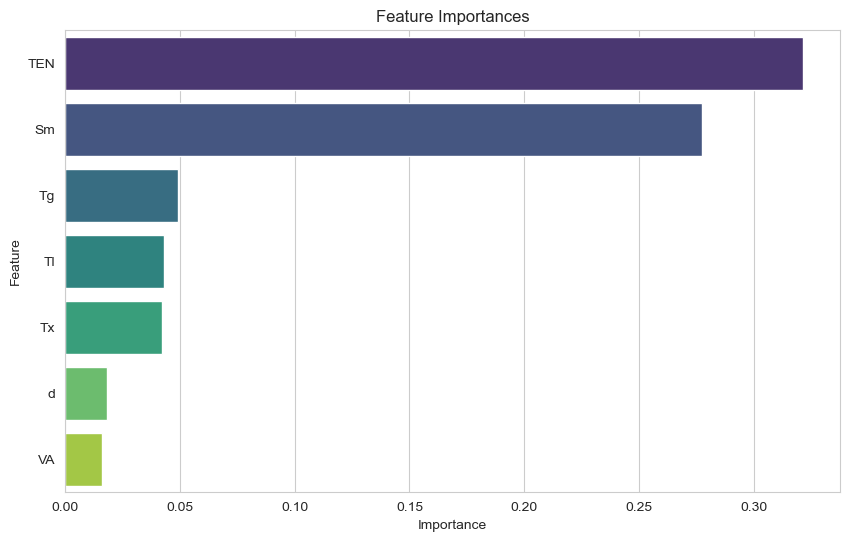

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the dictionary by importance (descending order)
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print feature importances
for feature, importance in sorted_feature_importance_dict.items():
    print(f"{feature}: {importance}")

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_feature_importance_dict.values()), y=list(sorted_feature_importance_dict.keys()), palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


<Axes: xlabel='Trg', ylabel='Dmax'>

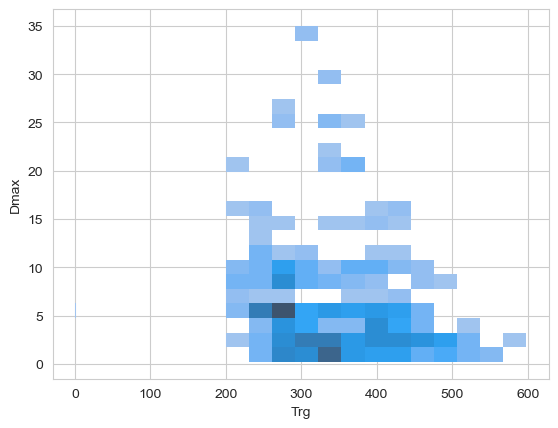

In [102]:
df1 = df
df1['Trg'] = df1['Tg']/df1['Tl']
df1['del_Tx'] = df1['Tl']-df['Tx']


sns.histplot(x = 'Trg', y = 'Dmax', data = df1)

sns.histplot(x = 'del_Tx', y = 'Dmax', data = df1)

# Explainablity- Use of SHAP values

In [ ]:
pip install shap

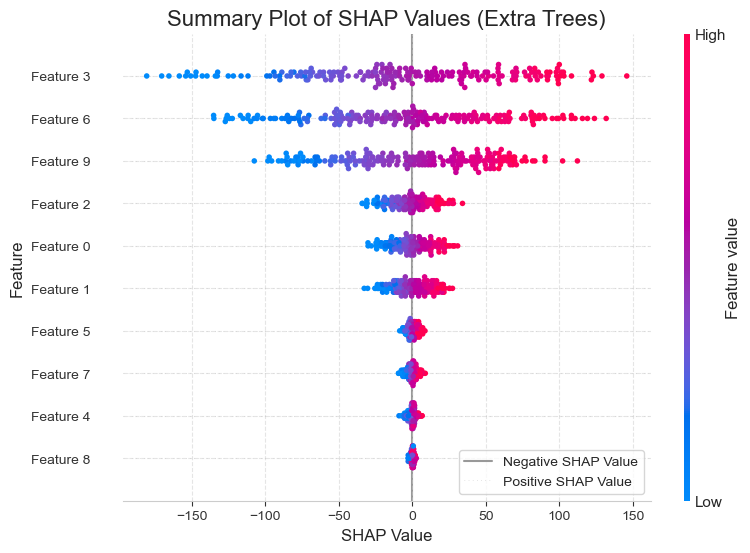

In [95]:
import shap
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
# Assuming X_test is your test data
# Assuming et_model is your trained ExtraTreesRegressor model

# Train the model
et_model = ExtraTreesRegressor()
et_model.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(et_model)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values with custom styling
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)

# Add title and labels
plt.title('Summary Plot of SHAP Values (Extra Trees)', fontsize=16)
plt.xlabel('SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Customize tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(['Negative SHAP Value', 'Positive SHAP Value'], loc='lower right', fontsize=10)

# Show plot
plt.show()


Analyzing SHAP (SHapley Additive exPlanations) values can provide insights into how each feature contributes to the models predictions. Here's how you can interpret SHAP values:

1. **Magnitude of SHAP Values**:
   - The magnitude of SHAP values indicates the impact of a feature on the model's prediction for a specific instance.
   - Large positive SHAP values indicate that the feature pushes the prediction higher, whil large negative SHAP values indicate the opposite.
   - Features with SHAP values close to zero have little impact on the prediction.

2. **Direction of Impact**:
   - Positive SHAP values indicate that the feature contributes to increasing the prediction.
   - Negative SHAP values indicate that the feature contributes to decreasing the prediction.

3. **Feature Importance**:
   - Features with consistently large SHAP values across multiple instances are considered important for the model's predictions.
   - Conversely, features with SHAP values close to zero or fluctuating around zero may have less importance.

4. **Interaction Effects**:
   - SHAP values can also reveal interaction effects between features. For example, if the SHAP value of one feature changes depending on the value of another feature, it suggests an interaction between the two features.

5. **Global vs. Local Importance**:
   - Global SHAP values provide an overall understanding of feature importance across all instances in the dataset.
   - Local SHAP values are specific to individual instances and provide insights into why a particular prediction was made for that instance.

6. **Consistency of Impact**:
   - It's essential to assess the consistency of a feature's impact across different instances. Features with inconsistent impacts may indicate model instability or noise in the data.

7. **Model Interpretability**:
   - SHAP values can help make complex models interpretable by providing insights into the contribution of each feature to individual predictions.

By analyzing SHAP values, you can gain a deeper understanding of how your model makes predictions and identify important features that drive those predictions. This understanding can inform feature engineering, model improvement, and decision-making processes.

In [ ]:
df1 = df
df1['Trg'] = df1['Tg']/df1['Tl']
df1['del_Tx'] = df1['Tl']-df['Tx']


sns.histplot(x = 'Trg', y = 'Dmax', data = df1)

sns.histplot(x = 'del_Tx', y = 'Dmax', data = df1)